In [1]:
# Packages used within the code

import boolean2 as b2             # boolean2 is used to produced the model
import matplotlib.pyplot as plt   # matplotlib is used to produce the grpahs of the model
import re                         # re was used during personal code checks of the model but currently is not used.

In [2]:
# This first part is setting up the model
model_definition = """

# This first section is defining the inital state of every node in the system beggining with complexs and miscellaneous nodes

ENDOCYTOSIS_VESICLE_STAGE_1=False
ENDOCYTOSIS_VESICLE_STAGE_2=False
ENDOCYTOSIS_VESICLE_STAGE_3=False
ENDOCYTOSIS_VESICLE_STAGE_4=False
ENDOCYTOSIS_VESICLE_STAGE_5=False
ENDOCYTOSIS_VESICLE_STAGE_6=False
CLASP_PROTEINS_CARGO=False
ARP2_3_COMPLEX=False
AP-2_COMPLEX_CARGO=False
CLASP_PROTEINS=True
GOLGI-ASSOCIATED_VESICLE_DESTINED_CARGO=False
GOLGI_VESICLE_STAGE_1=False
GOLGI_VESICLE_STAGE_2=False
GOLGI_VESICLE_STAGE_3 =False
CLAT_AP1_CLVS_PI_3_5_P2=False
AP1G2_HGS_CHMP2A=False
AP-1_COMPLEX=False
HSC70_AUXILLIN_COMPLEX=False
LYSOSOME_DESTINED_CARGO=False
LYSOSOME_VESICLE_STAGE_1=False
LYSOSOME_VESICLE_STAGE_2=False
LYSOSOME_VESICLE_STAGE_3=False
WASPS_COMPLEX_STAGE_1=False
WASPS_COMPLEX_STAGE_2=False
MOTHER_FILAMENT_BRANCHING_COMPLEX=True
FC_GAMMA_PHAGOCYTOSIS=False
G-ACTIN=False
ESCRT-0=False
ESCRT-I=False
ESCRT-II=False
ESCRT-III=False
ESCRT-0_CARGO_COMPLEX=False
ESCRT-I_CARGO_COMPLEX=False
ESCRT-II_CARGO_COMPLEX=False
ESCRT-III_CARGO_COMPLEX=False
VPS_VTA1=False
HSPA8_BOUND_AUTOPHAGIC_SUBSTRATES=False
VPS35_VPS29_VPS26=False
RAB1_COMPLEX_STAGE_1=False
RAB1_COMPLEX_STAGE_2=False
RAB1_COMPLEX_STAGE_3=False
RAB1_COMPLEX_STAGE_4A=False
RAB1_COMPLEX_STAGE_5A=False
KINSINS=False
GOLGI_TO_ER_CARGO=True
EXOCYST_PATH_STAGE_1=False
EXOCYST_PATH_STAGE_2=False
EXOCYST_COMPLEX=False
RAB5COMPLEX=False
RAB7COMPLEX=False
LC3_COMPLEX_STAGE_1=False
LC3_COMPLEX_STAGE_2=False
LC3_PROTEINS=False
WLS_RETROMER=False
PL_HSPA8_AUTOPHAGY_SUBSTRATE=False
Autophagosome_formation=False
ACTIVEG-ACTIN=False
ACTIVEMOTHER=False
PHAGOPHORE=False

# These are the hit proteins
AP1B1=True
CHMP2A=True #BC-2
KIF6=True #C6orF102
CDC42=True #CDC42EP3
CHMP2B=True #DKFZP564O123
GGA1=True
HIP1R=True
VPS26B=True #MGC10485
VCP=False

# These are the TB proteins

MTB=True
ESXH=False
ESXG=False
NDKA=False
RV2074=False
SAPM=False


# Remaining proteins in network

RAB7GDP=True
RAB7GTP=True
CHM=True
TB=False
AUTOPHAGY_SUBSTRATES=True
COATOMER=True
CARGO=True
AP-2_COMPLEX=True
UBIQUINATED_CARGO=True
ACTB=True
ACTG1=True
ACTR2=True
ACTR3=True
ADRB2=True
AP1G2=True
ARPC1A=True
ARPC2=True
ARPC3=True
ARPC4=True
ARPC5=True
ARRB1=True
ASPSCR1=Random
AKT1=True
BNIP1=True
CHMP3=True
CHMP4A=True
CHMP4B=True
CHMP4C=True
CHMP6=True
CLSV2=True
CLTC=True
CTTN=True
DNM2=True
ENSG00000249884=True
EXOC1=True
EXOC4=True
EXOC5=True
EXOC6=True
FNBP1=True
FNBP1L=True
GABARAP=True
GABARAPL1=True
GABARAPL2=True
HGS=True
HSP8=True
HSP8A=True
KIF25=True
MAP1LC3A=True
MAP1LC3B=True
MAP1LC3C=True
MVB12A=True
MYO1C=True
RAB1A=True
RAB1B=True
RAB5GDP=True
RAB5GTP=True
RAB8A=True
SEC22B=True
SNAPIN=True
SNF8=True
SNX3=True
SNX5=True
SNX6=True
STAM=True
STAM2=True
SVIP=Random
SYT11=True
TBC1D3=True
TSG101=True
TXNDC5=True
UBXN2A=True
VAMP7=True
VAMP8=True
VPS25=True
VPS26A=True
VPS28=True
VPS29=True
VPS35=True
VPS36=True
VPS37A=True
VPS37B=True
VPS37C=True
VPS37D=True
VPS4A=True
VPS4B=True
VTA1=True
WASL=True
WLS=True
AKT2=True
TBC1D2=True
TBC1D15=True
offswitch=True
PIK3C3=True
BECLIN_1_COMPLEX=True
UBXN6=False
NSFL1C=Random
RUBCN=False

# Next are the boolean rules determining wether a node is turned on or off

# First are the rules for tb proteins ,NOTE 'offswitch' is added to the rules to allow the node to be turned off
ESXH*=MTB 
ESXG*=MTB 
NDKA*=MTB and not offswitch
RV2074*=MTB 
SAPM*=MTB and not offswitch

# Next are the rules for host COMPLEXES , functions and proteins.  Rules related to each other are grouped together

ENDOCYTOSIS_VESICLE_STAGE_1*= CLTC and AP-2_COMPLEX or ENDOCYTOSIS_VESICLE_STAGE_6 and CLTC
ENDOCYTOSIS_VESICLE_STAGE_2*= CLASP_PROTEINS_CARGO and ENDOCYTOSIS_VESICLE_STAGE_1
ENDOCYTOSIS_VESICLE_STAGE_3*=ENDOCYTOSIS_VESICLE_STAGE_6 and ENDOCYTOSIS_VESICLE_STAGE_2 or ENDOCYTOSIS_VESICLE_STAGE_2 and FNBP1L and FNBP1
ENDOCYTOSIS_VESICLE_STAGE_4*=ENDOCYTOSIS_VESICLE_STAGE_6 and ENDOCYTOSIS_VESICLE_STAGE_3 or ENDOCYTOSIS_VESICLE_STAGE_3 and ARP2_3_COMPLEX and WASL and HIP1R and SNX6
ENDOCYTOSIS_VESICLE_STAGE_5*=ENDOCYTOSIS_VESICLE_STAGE_6 and ENDOCYTOSIS_VESICLE_STAGE_3 or ENDOCYTOSIS_VESICLE_STAGE_3 and DNM2 or ENDOCYTOSIS_VESICLE_STAGE_4 and DNM2
ENDOCYTOSIS_VESICLE_STAGE_6*=ENDOCYTOSIS_VESICLE_STAGE_5 and RAB5GDP and HSP8A 
CLASP_PROTEINS_CARGO*=AP-2_COMPLEX and VAMP7 and SYT11 and CLTC and VAMP8 and ADRB2 and HGS and STAM and STAM2
ARP2_3_COMPLEX*=ACTR2 and ACTR3 and ARPC1A and ARPC2 and ARPC3 and ARPC4 and ARPC5

RAB5COMPLEX*=RAB5GTP and TBC1D3 and GGA1
RAB7COMPLEX*=RAB7GTP and RAB5COMPLEX and TBC1D15 and not SAPM
RAB5GTP*=RAB5GDP and ENDOCYTOSIS_VESICLE_STAGE_6 and not NDKA or RAB5GDP and CHM and not NDKA 
RAB7GTP*=RAB7GDP and CHM and not RAB7COMPLEX and not NDKA
AP-2_COMPLEX_CARGO*=AP-2_COMPLEX and CARGO

GOLGI-ASSOCIATED_VESICLE_DESTINED_CARGO*= SNAPIN and RAB5GTP and HIP1R and SNX6 or SNX3 and SNAPIN and RAB5GTP and HIP1R or SNX5 and SNAPIN and RAB5GTP and HIP1R
GOLGI_VESICLE_STAGE_1*=GOLGI-ASSOCIATED_VESICLE_DESTINED_CARGO and AP-1_COMPLEX and ARRB1 and DNM2 and VAMP7 or VAMP8 and GOLGI-ASSOCIATED_VESICLE_DESTINED_CARGO and AP-1_COMPLEX and ARRB1 and DNM2
GOLGI_VESICLE_STAGE_2*=GOLGI_VESICLE_STAGE_1 and CLTC
GOLGI_VESICLE_STAGE_3*=GOLGI_VESICLE_STAGE_2 and HSC70_AUXILLIN_COMPLEX
CLAT_AP1_CLVS_PI_3_5_P2*=CLSV2 and CLTC
AP1G2_HGS_CHMP2A*=HGS and CHMP2A and AP1G2
AP-1_COMPLEX*=AP1B1 and AP1G2
HSC70_AUXILLIN_COMPLEX*=HSP8A
LYSOSOME_DESTINED_CARGO*=TXNDC5
LYSOSOME_VESICLE_STAGE_1*=LYSOSOME_DESTINED_CARGO and ARRB1 and AP-1_COMPLEX and VAMP7 or VAMP8 and LYSOSOME_DESTINED_CARGO and ARRB1 and AP-1_COMPLEX
LYSOSOME_VESICLE_STAGE_2*=LYSOSOME_VESICLE_STAGE_1 and CLTC and DNM2
LYSOSOME_VESICLE_STAGE_3*=LYSOSOME_VESICLE_STAGE_2 and HSC70_AUXILLIN_COMPLEX

WASPS_COMPLEX_STAGE_1*=CDC42 and WASL
WASPS_COMPLEX_STAGE_2*=WASPS_COMPLEX_STAGE_1 and ARP2_3_COMPLEX and G-ACTIN
FC_GAMMA_PHAGOCYTOSIS*=MYO1C and ACTIVEMOTHER and ACTIVEG-ACTIN
ACTIVEMOTHER*= MOTHER_FILAMENT_BRANCHING_COMPLEX and WASPS_COMPLEX_STAGE_2 and ARP2_3_COMPLEX
ACTIVEG-ACTIN*=MOTHER_FILAMENT_BRANCHING_COMPLEX and WASPS_COMPLEX_STAGE_1
G-ACTIN*=ACTB and ACTG1

ESCRT-0*=STAM and STAM2 and HGS
ESCRT-I*=MVB12A and TSG101 and VPS28 and VPS37A and VPS37B and VPS37C and VPS37D
ESCRT-II*=SNF8 and VPS25 and VPS36
ESCRT-III*=CHMP2A and CHMP2B and CHMP3 and CHMP4A and CHMP4B and CHMP4C and ENSG00000249884 and VCP
ESCRT-0_CARGO_COMPLEX*=ESCRT-0 and UBIQUINATED_CARGO and not ESCRT-I_CARGO_COMPLEX
ESCRT-I_CARGO_COMPLEX*=ESCRT-I and ESCRT-0_CARGO_COMPLEX and not ESCRT-II_CARGO_COMPLEX
ESCRT-II_CARGO_COMPLEX*=ESCRT-II and ESCRT-I_CARGO_COMPLEX and not ESCRT-III_CARGO_COMPLEX
ESCRT-III_CARGO_COMPLEX*=ESCRT-III and ESCRT-II_CARGO_COMPLEX and not VPS_VTA1
VPS_VTA1*=VPS4A and VPS4B and VTA1 and ESCRT-III_CARGO_COMPLEX
HSPA8_BOUND_AUTOPHAGIC_SUBSTRATES*=AUTOPHAGY_SUBSTRATES and HSP8A
LC3_COMPLEX_STAGE_1*=LC3_PROTEINS
LC3_COMPLEX_STAGE_2*=ESCRT-III and LC3_COMPLEX_STAGE_1 and PHAGOPHORE
LC3_PROTEINS*=GABARAP and GABARAPL1 and GABARAPL2 and MAP1LC3A and MAP1LC3B and MAP1LC3C
PHAGOPHORE*=BECLIN_1_COMPLEX and PIK3C3
HGS*= HGS or not ESXH and not ESXG
PIK3C3*=PIK3C3 and not RUBCN
Autophagosome_formation*=LC3_COMPLEX_STAGE_2

PL_HSPA8_AUTOPHAGY_SUBSTRATE*=ESCRT-I and ESCRT-III
WLS_RETROMER*=VPS35_VPS29_VPS26 and WLS and SNX3 or VPS35_VPS29_VPS26 and WLS and  SNX5 or SNX6 and VPS35_VPS29_VPS26 and WLS
VPS35_VPS29_VPS26*= VPS35 and VPS29 and VPS26A and VPS26B

RAB1_COMPLEX_STAGE_1*=COATOMER and RAB1A and RAB1B
RAB1_COMPLEX_STAGE_2*=RAB1_COMPLEX_STAGE_1 and SEC22B and GOLGI_TO_ER_CARGO
RAB1_COMPLEX_STAGE_3*=RAB1_COMPLEX_STAGE_2 and KINSINS and BNIP1 and SNX3 or SNX5 and RAB1_COMPLEX_STAGE_2 and KINSINS and BNIP1 or SNX6 and RAB1_COMPLEX_STAGE_2 and KINSINS and BNIP1 
RAB1_COMPLEX_STAGE_4A*=RAB1_COMPLEX_STAGE_5A and BNIP1
RAB1_COMPLEX_STAGE_5A*=RAB1_COMPLEX_STAGE_4A
KINSINS*=KIF25 and KIF6
EXOCYST_PATH_STAGE_1*=MYO1C and ACTG1 and AKT2 and AKT1
EXOCYST_PATH_STAGE_2*=RAB8A and EXOCYST_COMPLEX and EXOCYST_PATH_STAGE_1
EXOCYST_COMPLEX*=EXOC1 and EXOC4 and EXOC5 and EXOC6


#Rules for VCP placed here. Has been placed on it's own due to the many proteins involved

VCP*=SVIP and ASPSCR1 and not RV2074 or SVIP and not UBXN6  and not NSFL1C and not RV2074 or ASPSCR1 and not UBXN6 and not NSFL1C and not RV2074
#VCP*=not offswitch
"""

CARGO [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ACTG1 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
WLS [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
RUBCN [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
CHMP2B [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AKT1 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AKT2 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
CHMP2A [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
AP-2_COMPLEX [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
TXNDC5 [True, True, True, True, True, True, True, Tr

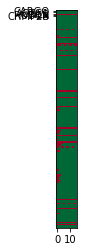

In [3]:
# Here the model is run
model = b2.Model(text=model_definition, mode='sync')
model.initialize()
model.iterate(steps=15)

# The plot for every node is set here, although it is not labled so just exists to quickly visually check the model is working
image = list()
for node in model.data:
    image.append(model.data[node])
plt.yticks(range(0,5), model.data)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')

# Here the state of each node is printed out
for node in model.data:
    print node, model.data[node]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_2
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_6
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_5
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_4
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
MTB
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ENDOCYTOSIS_VESICLE_STAGE_3


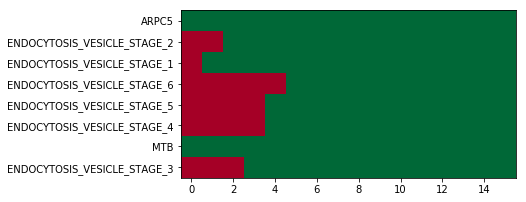

In [4]:
from boolean2 import util

# The following plots all show the components of individaul pathways that string identified

coll = util.Collector()
for i in range(10):
    model = b2.Model(text=model_definition, mode='sync')
    model.initialize()
    model.iterate(steps=15)
    coll.collect(states=model.states, nodes=model.nodes)
avgs = coll.get_averages()

image = list()
ticks = list()
for node in model.data:
    if (node== "MTB" or node == "ENDOCYTOSIS_VESICLE_STAGE_1"or node == "ENDOCYTOSIS_VESICLE_STAGE_2"or node == "ENDOCYTOSIS_VESICLE_STAGE_3"or node == "ENDOCYTOSIS_VESICLE_STAGE_4"or node == "ENDOCYTOSIS_VESICLE_STAGE_5"or node == "ENDOCYTOSIS_VESICLE_STAGE_6" or node == "ARPC5"):
        print avgs[node]
        print node
        ticks.append(node)
        image.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Clathrin.png')

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
RAB7COMPLEX
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB5GTP
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB5GDP
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


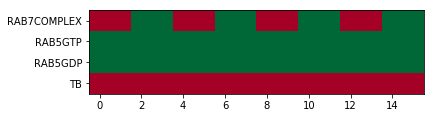

In [5]:
from boolean2 import util

image = list()
ticks = list()
for node in model.data:
    if (node== "TB" or node == "RAB7COMPLEX" or node =="RAB5GTP" or node=="RAB5GDP"):
        print avgs[node]
        print node
        ticks.append(node)
        image.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Rab.png')

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CLAT_AP1_CLVS_PI_3_5_P2
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
GOLGI_VESICLE_STAGE_3
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
GOLGI_VESICLE_STAGE_2
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
GOLGI_VESICLE_STAGE_1
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LYSOSOME_VESICLE_STAGE_3
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LYSOSOME_VESICLE_STAGE_2
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LYSOSOME_VESICLE_STAGE_1
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
AP1G2_HGS_CHMP2A
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB

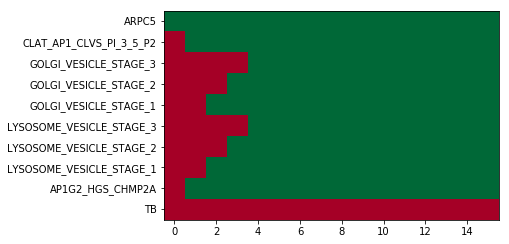

In [6]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node == "LYSOSOME_VESICLE_STAGE_1"or node == "LYSOSOME_VESICLE_STAGE_2"or node == "LYSOSOME_VESICLE_STAGE_3"or node == "GOLGI_VESICLE_STAGE_1"or node == "GOLGI_VESICLE_STAGE_2"or node == "GOLGI_VESICLE_STAGE_3" or node =="ARPC5" or node =="CLAT_AP1_CLVS_PI_3_5_P2" or node =="AP1G2_HGS_CHMP2A" ):
        print avgs[node]
        print node
        ticks.append(node)        
        image2.append(avgs[node])
plt.yticks(range(0,10), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('golgiandlysosome.png')

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
FC_GAMMA_PHAGOCYTOSIS
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
WASPS_COMPLEX_STAGE_2
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
WASPS_COMPLEX_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


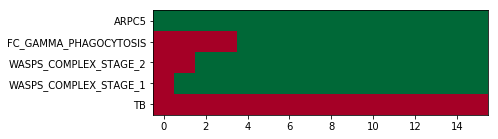

In [7]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node== "WASPS_COMPLEX_STAGE_1" or node == "WASPS_COMPLEX_STAGE_2"or node == "FC_GAMMA_PHAGOCYTOSIS" or node =="ARPC5" ):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,9), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Phagocyctosisactivation.png')

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
ESCRT-II_CARGO_COMPLEX
[0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
VCP
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ESCRT-III_CARGO_COMPLEX
[0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
PL_HSPA8_AUTOPHAGY_SUBSTRATE
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
ESCRT-0_CARGO_COMPLEX
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
ESCRT-I_CARGO_COMPLEX


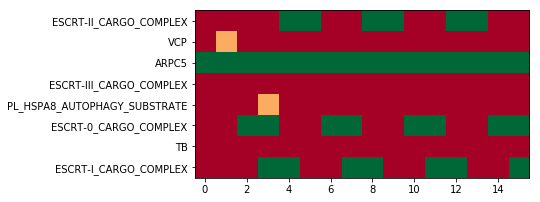

In [8]:
image2 = list()
ticks = list()
exportlist=[]
for node in model.data:
    if (node=="TB" or node== "ESCRT-0_CARGO_COMPLEX" or node == "ESCRT-I_CARGO_COMPLEX"or node == "ESCRT-II_CARGO_COMPLEX" or node =="ESCRT-III_CARGO_COMPLEX" or node =="HSPA8_bound autophagic_substrates" or node =="PL_HSPA8_AUTOPHAGY_SUBSTRATE" or node =="ARPC5" or node =="VCP" ):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,9), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('ESCRT.png')

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
WLS_RETROMER
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
VPS35_VPS29_VPS26
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


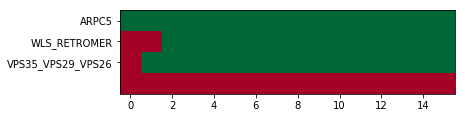

In [9]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node =="ARPC5" or node== "WLS_RETROMER" or node == "VPS35_VPS29_VPS26" ):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,3), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Retromer.png')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
RAB1_COMPLEX_STAGE_4A
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB1_COMPLEX_STAGE_3
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB1_COMPLEX_STAGE_2
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB1_COMPLEX_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
RAB1_COMPLEX_STAGE_5A


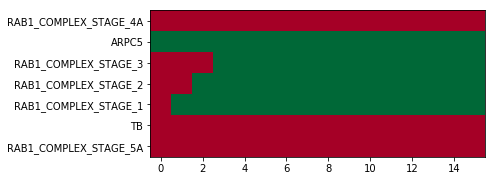

In [10]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node =="ARPC5" or node== "RAB1_COMPLEX_STAGE_1" or node == "RAB1_COMPLEX_STAGE_2"or node =="RAB1_COMPLEX_STAGE_3" or node =="RAB1_COMPLEX_STAGE_4A" or node =="RAB1_COMPLEX_STAGE_5A" ):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('RAB1.png')

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
EXOCYST_PATH_STAGE_2
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
EXOCYST_COMPLEX
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
EXOCYST_PATH_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


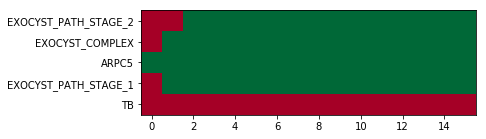

In [11]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node =="ARPC5" or node== "EXOCYST_PATH_STAGE_1" or node == "EXOCYST_PATH_STAGE_2"or node =="EXOCYST_COMPLEX"):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('exocystpath.png')

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
LC3_COMPLEX_STAGE_2
[0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Autophagosome_formation
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LC3_COMPLEX_STAGE_1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


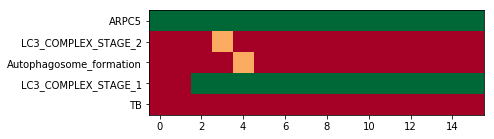

In [12]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node =="ARPC5" or node== "LC3_COMPLEX_STAGE_1" or node == "LC3_COMPLEX_STAGE_2"or node =="Autophagosome_formation"):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Autosomeformation.png')

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RAB5COMPLEX
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ARPC5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TB


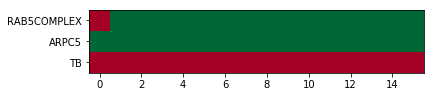

In [13]:
image2 = list()
ticks = list()
for node in model.data:
    if (node=="TB" or node =="ARPC5" or node== "RAB5COMPLEX" or node == "RAB5_COMPLEX_STAGE_2"):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,8), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Rabactivation.png')

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
RAB7COMPLEX
[0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Autophagosome_formation
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LYSOSOME_VESICLE_STAGE_3
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
FC_GAMMA_PHAGOCYTOSIS
[0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ESCRT-III


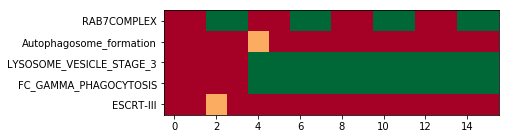

In [14]:
#Here represnetive nodes from relevant pathways are ploted 

image2 = list()
ticks = list()
for node in model.data:
    if ( node =="ESCRT-III"  or node =="RAB7COMPLEX" or node =="Autophagosome_formation"  or node =="LYSOSOME_VESICLE_STAGE_3" or node =="FC_GAMMA_PHAGOCYTOSIS" ):
        print avgs[node]
        print node
        ticks.append(node)
        image2.append(avgs[node])
plt.yticks(range(0,15), ticks)
plt.imshow(image2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
plt.savefig('Hitcomplexes.pdf')